# Импорт библиотек

In [1]:
import numpy as np
from gzip import open # NB: overrides standard open()
import pickle as pkl
import pandas as pd
import warnings 
from glob import glob
import os
import math
import functools

### Отключим предупреждения Anaconda

In [2]:
warnings.simplefilter('ignore')

# Загрузим данные

In [3]:
Xdata_numpy = pkl.load(open('C:/Users/admin/Desktop/PLS_continue_2020/X.pkl.gz', 'rb'))
Ydata = pkl.load(open('C:/Users/admin/Desktop/PLS_continue_2020/y.pkl.gz', 'rb'))

# N-PLS1

## Выберем столбец у с которым будем работать

In [4]:
parameters={'numbers_of_learning':10, 'numbers_of_components':55, 'testSize':0.2857, 'column_y':0}

# Приближение к правильному алгоритму

In [5]:
from sklearn.model_selection import train_test_split

#### Центрирование данных

In [6]:
x_centrir=np.array(Xdata_numpy["X"])

In [7]:
y_centrir=Ydata.iloc[:,parameters['column_y']].to_numpy()

In [8]:
x_centrir -= x_centrir.mean(axis = 0)

In [9]:
y_centrir -= y_centrir.mean()

#### Делим на тестовый и обучающий наборы

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
        x_centrir, y_centrir, test_size=parameters['testSize'] 
        )

#### Получаем ошибки

In [11]:
from sklearn.metrics import mean_squared_error

In [117]:
x=X_train
y=y_train
y=np.array(y)
x=np.array(x)
Tt=[]
output=np.zeros([parameters['numbers_of_components']])
mass=np.zeros([y.shape[0]])
for f in range(0,parameters['numbers_of_components']):
    z=np.zeros([x.shape[1],x.shape[2]])
    x_product=np.zeros([y.shape[0],x.shape[1],x.shape[2]])
    for i in range(0,y.shape[0]):
        x_product[i,:,:]=np.dot(x[i,:,:],y[i])
    z=x_product.sum(axis=0)
    Wk, S, WI = np.linalg.svd(z)
    w_k=np.array(Wk[0,:]).reshape(x.shape[1],1)
    w_i=np.array(WI[0,:]).reshape(x.shape[2],1)
    t=[]
    for h in range(0,x.shape[0]):
        t+=[np.dot(np.dot(w_k.transpose(),x[h,:,:]),w_i)]
    t=np.array(t).reshape(x.shape[0],1)
    Tt+=[t]
    T=np.array(Tt).reshape(x.shape[0],f+1)
    bf=np.dot(np.dot(np.linalg.inv(np.dot(T.transpose(),T)),T.transpose()),y)
    for g in range(0,x.shape[0]):
        x[g,:,:]=x[g,:,:]-(t[g]*w_i.transpose()*w_k)
    y=y-(np.dot(T,bf))
    mass+=np.dot(T,bf)   
    output[f]+=mean_squared_error(mass,y_train)
np.array(output).reshape(1,parameters['numbers_of_components'])

array([[5.88770378e+01, 5.63102183e+01, 5.16805840e+01, 4.70367820e+01,
        3.90418848e+01, 2.35146355e+01, 1.66156486e+01, 1.44741283e+01,
        1.14443045e+01, 7.70958485e+00, 4.81199975e+00, 2.31114895e+00,
        1.80044286e+00, 1.17694239e+00, 4.00829756e-01, 1.10361439e-01,
        8.23460457e-02, 7.64814114e-02, 2.57215248e-02, 9.48106618e-03,
        3.97949779e-03, 8.39433392e-04, 1.79548399e-04, 2.66465093e-05,
        7.37620012e-16, 6.66976352e-19, 2.01383747e-18, 5.77746014e-17,
        2.34172144e-15, 2.51619349e-11, 2.02281567e-11, 2.71241272e-10,
        1.70368114e-10, 3.69820717e-10, 1.22373112e-08, 3.46329663e-07,
        1.11321535e-06, 3.14315214e-06, 5.78643588e-03, 6.33444422e-01,
        5.76168221e+00, 8.33843280e+00, 1.28122483e+03, 6.90714712e+02,
        5.35695876e+05, 1.10948171e+08, 2.23539134e+09, 6.62010802e+10,
        1.72386046e+11, 2.78826520e+13, 1.92293901e+15, 6.32091331e+19,
        5.88498180e+20, 1.23226692e+24, 1.55638420e+26]])

In [118]:
output

array([5.88770378e+01, 5.63102183e+01, 5.16805840e+01, 4.70367820e+01,
       3.90418848e+01, 2.35146355e+01, 1.66156486e+01, 1.44741283e+01,
       1.14443045e+01, 7.70958485e+00, 4.81199975e+00, 2.31114895e+00,
       1.80044286e+00, 1.17694239e+00, 4.00829756e-01, 1.10361439e-01,
       8.23460457e-02, 7.64814114e-02, 2.57215248e-02, 9.48106618e-03,
       3.97949779e-03, 8.39433392e-04, 1.79548399e-04, 2.66465093e-05,
       7.37620012e-16, 6.66976352e-19, 2.01383747e-18, 5.77746014e-17,
       2.34172144e-15, 2.51619349e-11, 2.02281567e-11, 2.71241272e-10,
       1.70368114e-10, 3.69820717e-10, 1.22373112e-08, 3.46329663e-07,
       1.11321535e-06, 3.14315214e-06, 5.78643588e-03, 6.33444422e-01,
       5.76168221e+00, 8.33843280e+00, 1.28122483e+03, 6.90714712e+02,
       5.35695876e+05, 1.10948171e+08, 2.23539134e+09, 6.62010802e+10,
       1.72386046e+11, 2.78826520e+13, 1.92293901e+15, 6.32091331e+19,
       5.88498180e+20, 1.23226692e+24, 1.55638420e+26])

#### Сразу создам файл для выгрузки результатов этого шага построения модели, что б, когда работа будет идти на финальной стадии не обучаться с нуля

In [33]:
pkl.dump(output,open('C:/Users/admin/Desktop/PLS_continue_2020/output.pkl.gz', 'wb'))

#### Рисуем ошибки

In [34]:
import matplotlib.pyplot as plt

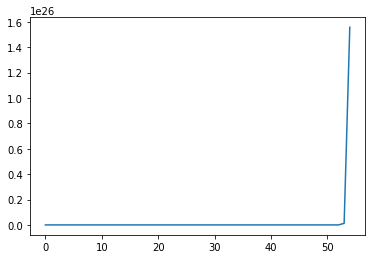

In [119]:
plt.plot(output)
plt.show();

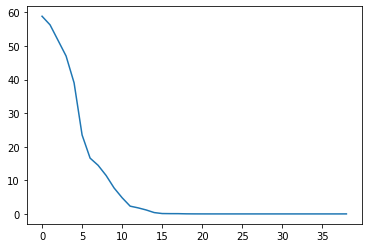

In [120]:
plt.plot(output[0:39])
plt.show();

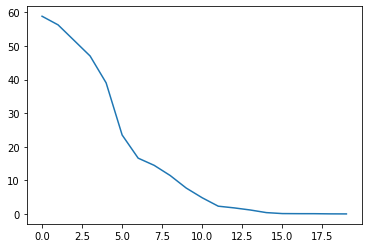

In [121]:
plt.plot(output[0:20])
plt.show();

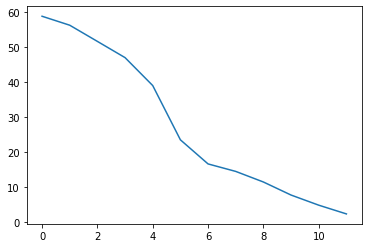

In [122]:
plt.plot(output[0:12])
plt.show();

# Попробую оформить всё в виде полноценного класса

In [15]:
from sklearn.base import BaseEstimator
from sklearn.base import RegressorMixin

In [16]:
class N_PLS1_first(BaseEstimator, RegressorMixin):
    def  __init__(self, n_components=2, *,norm_y_weights=False, scale=True, max_iter=500, tol=1e-06, copy=True):
        self.n_components = n_components
        self.norm_y_weights = norm_y_weights
        self.scale = scale
        self.max_iter = max_iter
        self.tol = tol
        self.copy = copy
        

In [17]:
a=N_PLS1_first(3)

In [18]:
a

N_PLS1_first(copy=True, max_iter=500, n_components=3, norm_y_weights=False,
             scale=True, tol=1e-06)

In [ ]:
# пока в планах
class N_PLS1():
    def error(a,b):
        s=0
        for i in range(0,len(a)):
            s+=((a[i]-b.iloc[i]))**2
        return s
    def function_1(x,y,fn):
        Tt=[]
        mass=np.zeros([y.shape[0]])
        output=[]
        for f in range(0,fn):
            z=np.zeros([x.shape[1],x.shape[2]])
            for i in range(0,x.shape[2]):
                for j in range(0,x.shape[1]):
                    zsum=0
                    for k in range(0,x.shape[0]):
                        zsum= zsum+ x[k,j,i]*y[k]
                    z[j,i]=zsum
            Wk, S, WI = np.linalg.svd(z)
            w_k=np.array(Wk[0,:]).reshape(x.shape[1],1)
            w_i=np.array(WI[0,:]).reshape(x.shape[2],1)
            t=[]
            for h in range(0,x.shape[0]):
                t+=[np.dot(np.dot(w_k.transpose(),x[h,:,:]),w_i)]
            t=np.array(t).reshape(x.shape[0],1)
            Tt+=[t]
            T=np.array(Tt).reshape(x.shape[0],f+1)
            bf=np.dot(np.dot(np.linalg.inv(np.dot(T.transpose(),T)),T.transpose()),y)
            for g in range(0,x.shape[0]):
                x[g,:,:]=x[g,:,:]-(t[g]*w_i.transpose()*w_k)
            y=y-(np.dot(T,bf))
            mass+=np.dot(T,bf)
            output+=[error(mass,y_train)]
        return output
    def fit(x,y,fn):
        
            
        return y

In [179]:
y

array([34.19308759, 35.72443085, 46.32211944, 35.69579348, 47.44184036,
       33.34204937, 42.44462856, 39.9018207 , 44.39973652, 54.64066407,
       53.71596802, 44.04933373, 36.11255278, 34.24246421, 36.22622795,
       26.1974747 , 41.0398005 , 31.41066637, 34.07047331, 42.14770231,
       45.44679116, 21.41118209, 44.54683093, 35.35460545, 36.47993911])

In [395]:
output=np.zeros([parameters['numbers_of_components']])
for v in range(0,parameters['numbers_of_learning']):
    X_train, X_test, y_train, y_test = train_test_split(
        Xdata_numpy["X"], Ydata.iloc[:,parameters['column_y']], test_size=parameters['testSize'] 
        )
    x=X_train
    y=y_train
    y=np.array(y)
    x=np.array(x)
    Tt=[]
    mass=np.zeros([y.shape[0]])
    for f in range(0,parameters['numbers_of_components']):
        z=np.zeros([x.shape[1],x.shape[2]])
        for i in range(0,x.shape[2]):
            for j in range(0,x.shape[1]):
                zsum=0
                for k in range(0,x.shape[0]):
                    zsum= zsum+ x[k,j,i]*y[k]
                z[j,i]=zsum
        Wk, S, WI = np.linalg.svd(z)
        w_k=np.array(Wk[0,:]).reshape(x.shape[1],1)
        w_i=np.array(WI[0,:]).reshape(x.shape[2],1)
        t=[]
        for h in range(0,x.shape[0]):
            t+=[np.dot(np.dot(w_k.transpose(),x[h,:,:]),w_i)]
        t=np.array(t).reshape(x.shape[0],1)
        Tt+=[t]
        T=np.array(Tt).reshape(x.shape[0],f+1)
        bf=np.dot(np.dot(np.linalg.inv(np.dot(T.transpose(),T)),T.transpose()),y)
        for g in range(0,x.shape[0]):
            x[g,:,:]=x[g,:,:]-(t[g]*w_i.transpose()*w_k)
        y=y-(np.dot(T,bf))
        mass+=np.dot(T,bf)   
        output[f]+=error(mass,y_train)
np.array(output).reshape(1,parameters['numbers_of_components'])

array([[5.20396143e+04, 4.91918971e+04, 4.38839916e+04, 3.88590076e+04,
        3.28461510e+04, 2.71640444e+04, 2.06742360e+04, 1.51864921e+04,
        1.08940127e+04, 7.45914196e+03, 5.10460116e+03, 3.13773457e+03,
        1.85325287e+03, 8.68438137e+02, 4.09180232e+02, 2.46334649e+02,
        1.76439608e+02, 1.32129844e+02, 1.09666897e+02, 8.20938712e+01,
        4.59856659e+01, 2.60763430e+01, 1.10681096e+01, 4.58247849e+00,
        9.94812128e-01, 1.09443246e-07, 1.55442375e-08, 1.07111515e-08,
        4.36357780e-09, 8.25991184e-09, 8.28521838e-09, 3.91514087e-08,
        4.05800265e-07, 9.57270667e-08, 3.17840084e-06, 2.82484373e-06,
        6.49010797e-07, 2.30233617e-04, 7.71299123e-03, 1.62744298e-01,
        6.11296107e+01, 1.03835530e+03, 1.01042473e+03, 4.74122861e+03,
        6.23619775e+04, 9.49571644e+04, 1.22425553e+06, 5.50510253e+06,
        5.15620269e+06, 4.28673709e+06, 1.03028491e+09, 1.22720823e+12,
        9.71049882e+14, 6.76286674e+15, 4.44894505e+18]])

In [107]:
pp=np.array([[[1,2],[3,4]],[[5,6],[7,8]]])

In [94]:
pp

[[[1, 2], [3, 4]], [[5, 6], [7, 8]]]

In [108]:
np.dot(pp,(7))

array([[[ 7, 14],
        [21, 28]],

       [[35, 42],
        [49, 56]]])

In [109]:
pp.sum(axis=0)

array([[ 6,  8],
       [10, 12]])

In [111]:
np.kron(np.array([7,6]),pp)

array([[[ 7, 14,  6, 12],
        [21, 28, 18, 24]],

       [[35, 42, 30, 36],
        [49, 56, 42, 48]]])